# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [4]:
import kagglehub
import shutil
import os
import pandas as pd
import matplotlib.pyplot as plt

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [5]:
# download dataset (ke cache kagglehub)
cache_path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

# folder tujuan di project
target_path = "../student-performance_raw"

# buat folder kalau belum ada
os.makedirs(target_path, exist_ok=True)

# copy semua file dari cache ke folder project
shutil.copytree(cache_path, target_path, dirs_exist_ok=True)

print("Dataset berhasil disimpan di:", target_path)


Dataset berhasil disimpan di: ../student-performance_raw


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
df = pd.read_csv("../student-performance_raw/StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [8]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [9]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [10]:
df["Exam_Score"].describe()

count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64

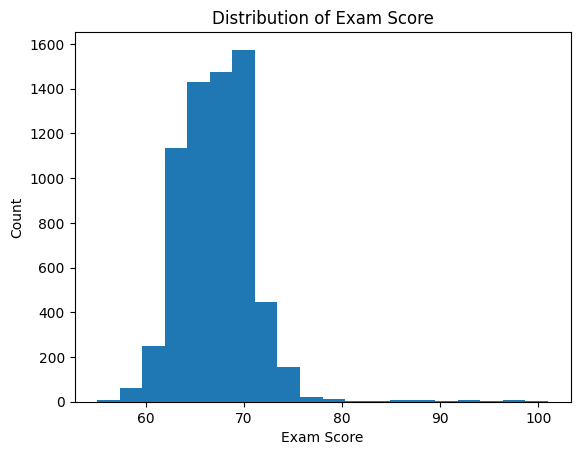

In [11]:
plt.hist(df["Exam_Score"], bins=20)
plt.title("Distribution of Exam Score")
plt.xlabel("Exam Score")
plt.ylabel("Count")
plt.show()

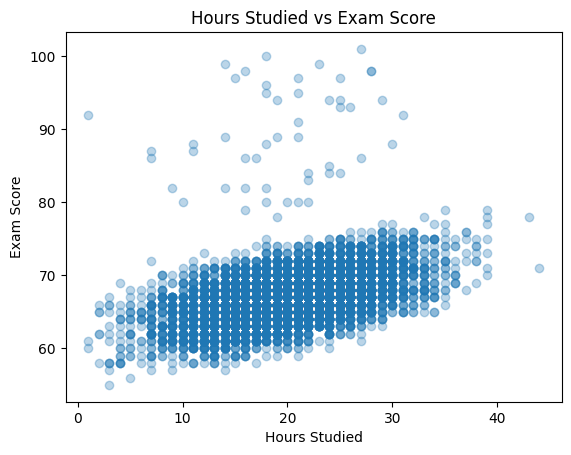

In [12]:
plt.scatter(df["Hours_Studied"], df["Exam_Score"], alpha=0.3)
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Hours Studied vs Exam Score")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [13]:
# Copy data agar tidak mengubah data asli
df_prep = df.copy()

# Isi missing value pada kolom kategorikal dengan modus
df_prep["Teacher_Quality"] = df_prep["Teacher_Quality"].fillna(
    df_prep["Teacher_Quality"].mode()[0]
)

df_prep["Parental_Education_Level"] = df_prep["Parental_Education_Level"].fillna(
    df_prep["Parental_Education_Level"].mode()[0]
)

df_prep["Distance_from_Home"] = df_prep["Distance_from_Home"].fillna(
    df_prep["Distance_from_Home"].mode()[0]
)

# Cek ulang missing value
df_prep.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [14]:
# Membuat label multiclass menggunakan quantile (kelas seimbang)
df_prep["Performance_Level"] = pd.qcut(
    df_prep["Exam_Score"],
    q=3,
    labels=["Low", "Medium", "High"]
)

# Cek distribusi label
df_prep["Performance_Level"].value_counts()

Performance_Level
Low       2882
Medium    2100
High      1625
Name: count, dtype: int64

In [15]:
# Pisahkan fitur dan label
X = df_prep.drop(columns=["Performance_Level", "Exam_Score"])
y = df_prep["Performance_Level"]

# One-Hot Encoding untuk fitur kategorikal
X_encoded = pd.get_dummies(X, drop_first=True)

# Gabungkan kembali fitur dan label (opsional, biar rapi)
df_final = X_encoded.copy()
df_final["Performance_Level"] = y.values

# Cek hasil
df_final.head()


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,...,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male,Performance_Level
0,23,84,7,73,0,3,True,False,False,False,...,True,False,True,False,True,False,False,True,True,Medium
1,19,64,8,59,2,4,True,False,False,True,...,True,False,False,False,False,False,True,False,False,Low
2,24,98,7,91,2,4,False,True,False,True,...,True,True,False,False,False,True,False,True,True,High
3,29,89,8,98,1,4,True,False,False,True,...,True,False,False,False,True,False,True,False,True,High
4,19,92,6,65,3,4,False,True,False,True,...,True,True,False,False,False,False,False,True,False,High
